<a href="https://colab.research.google.com/github/OscarTMa/heart-disease-classification./blob/main/notebooks/Heart_Disease_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Classification

This notebook performs an exploratory data analysis (EDA) on the **Heart Disease UCI** dataset. The goal is to identify patterns and relationships in the data to aid in building a classification model.

## 1. Importing Libraries
Let's start by importing the required Python libraries.

In [17]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Settings for visualizations
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Loading the Dataset
The dataset can be downloaded from Kaggle. For now, upload the file manually or use the relative path if it is in the `data/` directory.

In [18]:
# Load the dataset

import kagglehub


# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")
print("Path to dataset files:", path)

# Load CSV into a DataFrame
df = pd.read_csv(f"{path}/heart.csv")

# Display the first few rows
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 3. Data Overview
### 3.1. Dataset Shape
Understanding the number of rows and columns.

In [19]:
# Shape of the dataset
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

Dataset contains 918 rows and 12 columns.


### 3.2. Inspecting Columns
Checking data types, non-null counts, and basic statistics.

In [20]:
# Dataset information
df.info()

# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 4. Handling Missing Values
Identify and handle any missing values in the dataset.

In [21]:
# Checking for missing values
missing_values = df.isnull().sum()
print('Missing values per column:\n', missing_values)

Missing values per column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## 5. Data Visualization
Exploring the relationships between variables and the target.

- Distribution of numerical variables.
- Correlation heatmap.
- Relationship with target variable.

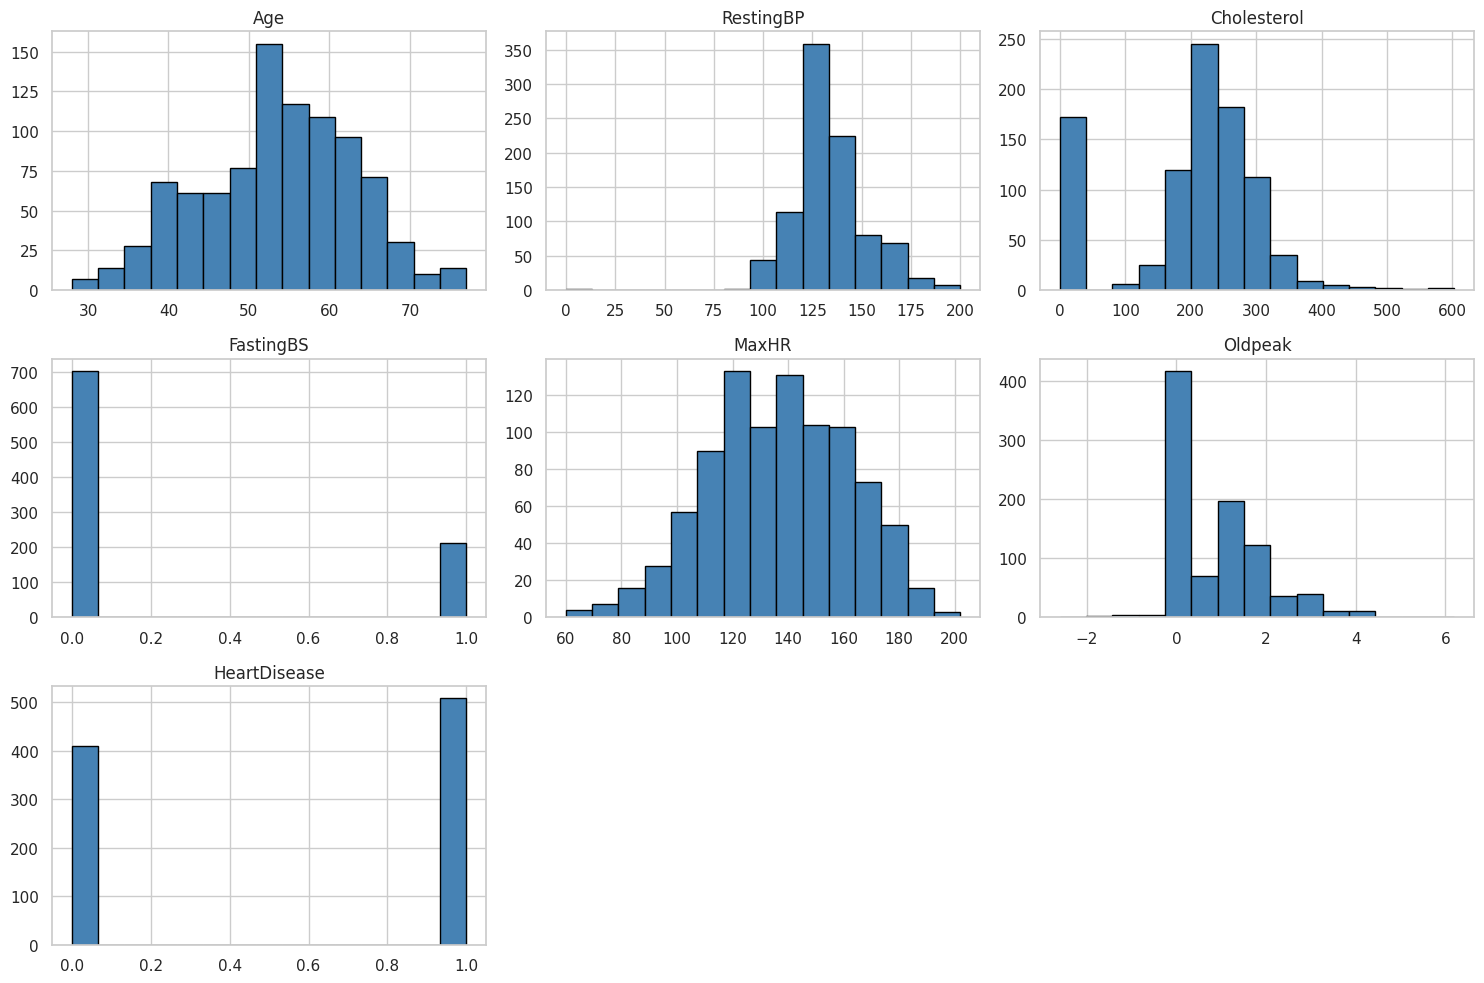

In [22]:
# Distribution of numerical variables
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(bins=15, figsize=(15, 10), color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()

In [23]:
# Convert categorical columns to numerical using one-hot encoding
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


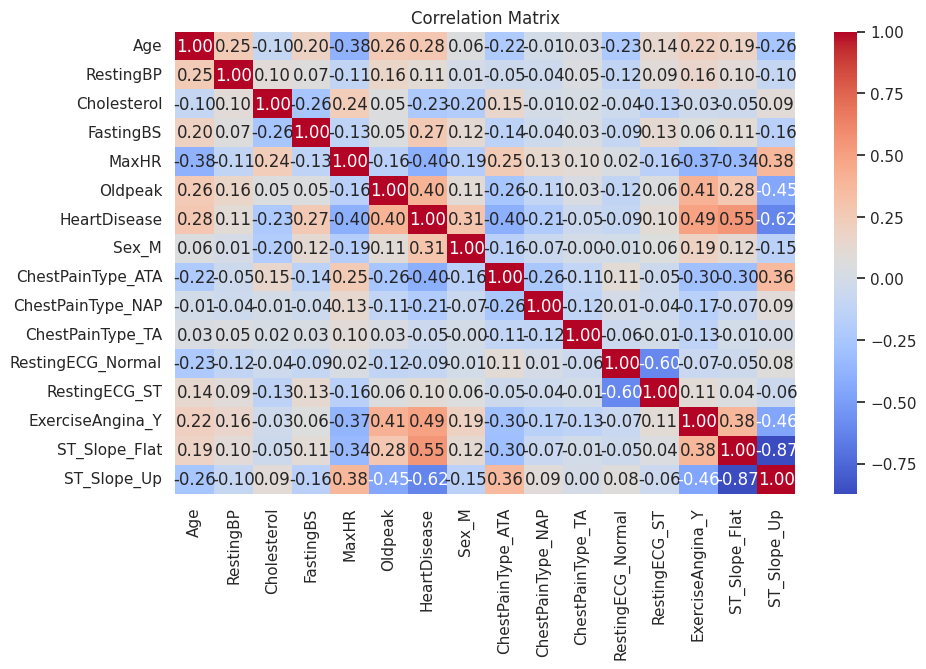

In [24]:
# Correlation heatmap
# Convert columns with 'M' and other potential string values to numeric
for column in df.select_dtypes(include=['object']).columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        # Handle columns that cannot be converted to numeric
        # For example, you can drop the column, use one-hot encoding, or map the values
        print(f"Column '{column}' could not be converted to numeric and will be dropped.")
        df = df.drop(column, axis=1)

# Calculate correlation matrix after converting columns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Rename the target column
df.rename(columns={'HeartDisease': 'target'}, inplace=True)


In [27]:
# Verify the column renaming
print(df.columns)


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'target', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


<ipython-input-28-a1d10e9330f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='viridis')


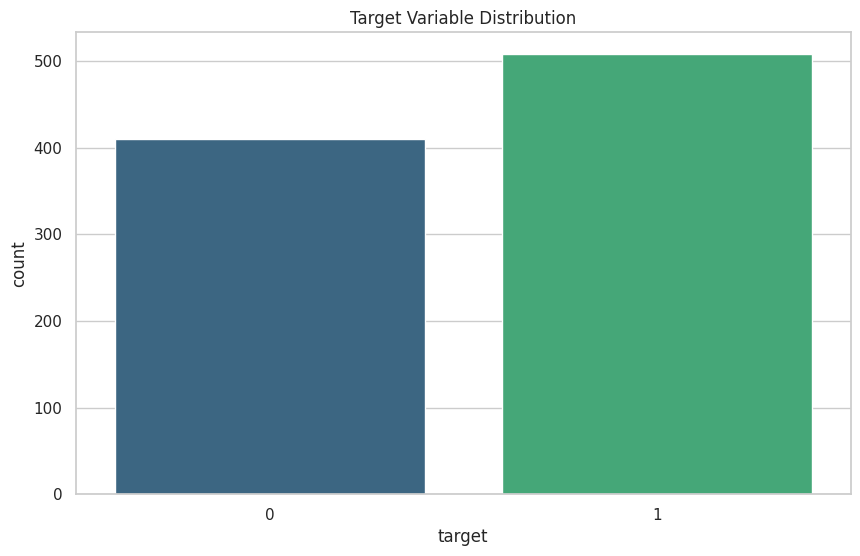

In [28]:
# Relationship with target variable
# Check if 'target' column exists in the DataFrame
if 'target' in df.columns:
    sns.countplot(data=df, x='target', palette='viridis')
    plt.title('Target Variable Distribution')
    plt.show()
else:
    print("Column 'target' not found in the DataFrame.")
    # Investigate why the column is missing and fix the data loading or preprocessing steps

In [29]:
# 6. Feature Engineering and Preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
#Escalar características numéricas
scaler = StandardScaler()
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [32]:
# Separar características y objetivo
X = df.drop(columns=['target'])
y = df['target']

In [33]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# 7. Building Classification Models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [35]:
# Modelos a evaluar
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

In [36]:
# Entrenamiento de los modelos
for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Model {model_name} trained.")


Model Logistic Regression trained.
Model Decision Tree trained.
Model Random Forest trained.
Model XGBoost trained.


In [37]:
# 8. Evaluating Model Performance

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Evaluación de los modelos
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


Model: Logistic Regression
Accuracy: 0.8533
ROC AUC: 0.8556
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Confusion Matrix:
[[67 10]
 [17 90]]

Model: Decision Tree
Accuracy: 0.8370
ROC AUC: 0.8325
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        77
           1       0.86      0.86      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

Confusion Matrix:
[[62 15]
 [15 92]]

Model: Random Forest
Accuracy: 0.8750
ROC AUC: 0.8725
Classification Report:
              precision    recal